**Problem Statement:**
The objective of this project is to analyze customer tipping behavior and understand how factors like total bill, day, and group size influence tips.


 DATASET OVERVIEW

In [1]:
import pandas as pd
import seaborn as sns

df = sns.load_dataset("tips")
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [2]:
df.columns

Index(['total_bill', 'tip', 'sex', 'smoker', 'day', 'time', 'size'], dtype='object')

 SUMMURY

In [3]:
df.info

<bound method DataFrame.info of      total_bill   tip     sex smoker   day    time  size
0         16.99  1.01  Female     No   Sun  Dinner     2
1         10.34  1.66    Male     No   Sun  Dinner     3
2         21.01  3.50    Male     No   Sun  Dinner     3
3         23.68  3.31    Male     No   Sun  Dinner     2
4         24.59  3.61  Female     No   Sun  Dinner     4
..          ...   ...     ...    ...   ...     ...   ...
239       29.03  5.92    Male     No   Sat  Dinner     3
240       27.18  2.00  Female    Yes   Sat  Dinner     2
241       22.67  2.00    Male    Yes   Sat  Dinner     2
242       17.82  1.75    Male     No   Sat  Dinner     2
243       18.78  3.00  Female     No  Thur  Dinner     2

[244 rows x 7 columns]>

In [4]:
print(df)

     total_bill   tip     sex smoker   day    time  size
0         16.99  1.01  Female     No   Sun  Dinner     2
1         10.34  1.66    Male     No   Sun  Dinner     3
2         21.01  3.50    Male     No   Sun  Dinner     3
3         23.68  3.31    Male     No   Sun  Dinner     2
4         24.59  3.61  Female     No   Sun  Dinner     4
..          ...   ...     ...    ...   ...     ...   ...
239       29.03  5.92    Male     No   Sat  Dinner     3
240       27.18  2.00  Female    Yes   Sat  Dinner     2
241       22.67  2.00    Male    Yes   Sat  Dinner     2
242       17.82  1.75    Male     No   Sat  Dinner     2
243       18.78  3.00  Female     No  Thur  Dinner     2

[244 rows x 7 columns]


In [5]:
df.describe()

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


In [6]:
df['day'].value_counts()

,count
day,
Sat,87
Sun,76
Thur,62
Fri,19


In [7]:
df.groupby('sex')['total_bill'].mean()

/tmp/ipython-input-3379495421.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby('sex')['total_bill'].mean()


,total_bill
sex,
Male,20.744076
Female,18.056897


VISUALISATION

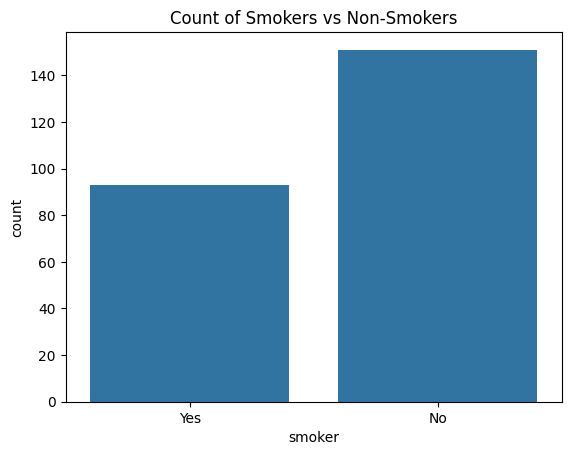

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='smoker', data=df)
plt.title("Count of Smokers vs Non-Smokers")
plt.show()


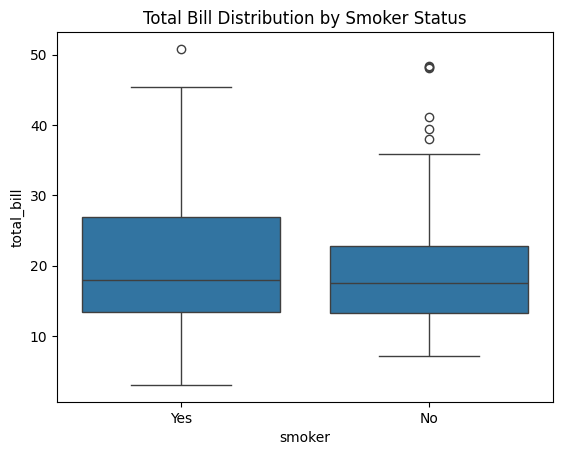

In [9]:
sns.boxplot(x='smoker', y='total_bill', data=df)
plt.title("Total Bill Distribution by Smoker Status")
plt.show()


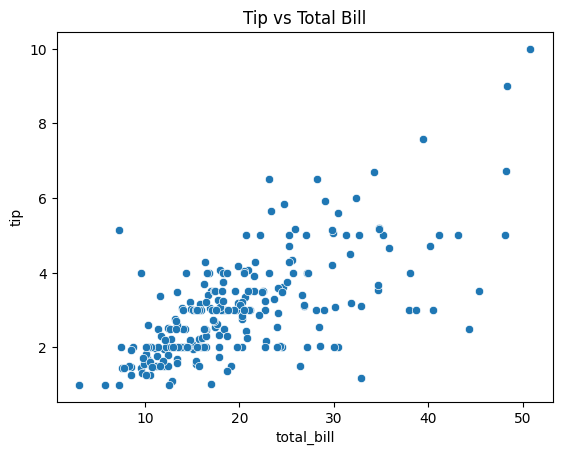

In [10]:
sns.scatterplot(x='total_bill', y='tip', data=df)
plt.title("Tip vs Total Bill")
plt.show()


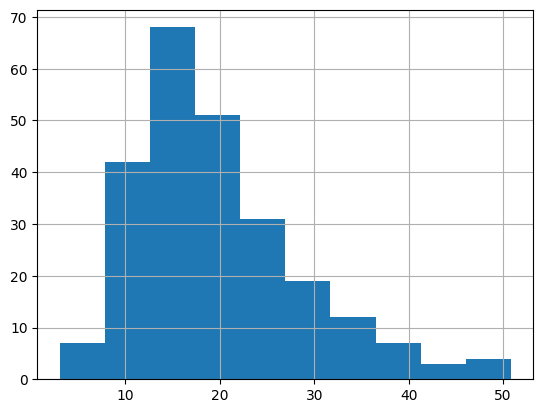

In [11]:
import matplotlib.pyplot as plt

df['total_bill'].hist()
plt.show()


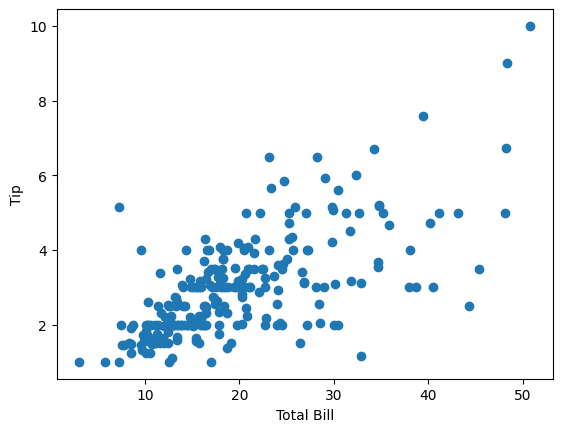

In [12]:
plt.scatter(df['total_bill'], df['tip'])
plt.xlabel("Total Bill")
plt.ylabel("Tip")
plt.show()


Correlation & Relationship Analysis

In [13]:
df[['total_bill', 'tip']].corr()


,total_bill,tip
total_bill,1.000000,0.675734
tip,0.675734,1.000000


In [14]:
df.groupby('day')['tip'].mean()

/tmp/ipython-input-4148581069.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby('day')['tip'].mean()


,tip
day,
Thur,2.771452
Fri,2.734737
Sat,2.993103
Sun,3.255132


In [15]:
df['tip_per_person'] = df['tip'] / df['size']
df[['tip', 'size', 'tip_per_person']].head()


,tip,size,tip_per_person
0,1.01,2,0.505000
1,1.66,3,0.553333
2,3.50,3,1.166667
3,3.31,2,1.655000
4,3.61,4,0.902500


In [16]:
df.groupby('sex')['tip'].mean()


/tmp/ipython-input-1322457109.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby('sex')['tip'].mean()


,tip
sex,
Male,3.089618
Female,2.833448


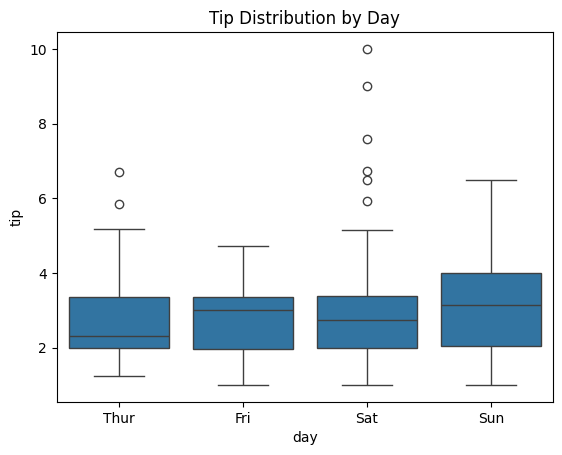

In [17]:
import seaborn as sns

sns.boxplot(x='day', y='tip', data=df)
plt.title('Tip Distribution by Day')
plt.show()


FEATURE ENGINEERING

In [18]:
df['tip_percent'] = (df['tip'] / df['total_bill']) * 100
df.head()


,total_bill,tip,sex,smoker,day,time,size,tip_per_person,tip_percent
0,16.99,1.01,Female,No,Sun,Dinner,2,0.505000,5.944673
1,10.34,1.66,Male,No,Sun,Dinner,3,0.553333,16.054159
2,21.01,3.50,Male,No,Sun,Dinner,3,1.166667,16.658734
3,23.68,3.31,Male,No,Sun,Dinner,2,1.655000,13.978041
4,24.59,3.61,Female,No,Sun,Dinner,4,0.902500,14.680765


In [19]:
df['tip_percent'].describe()

,tip_percent
count,244.000000
mean,16.080258
std,6.107220
min,3.563814
25%,12.912736
50%,15.476977
75%,19.147549
max,71.034483


In [20]:
df.groupby('day')['tip_percent'].mean()


/tmp/ipython-input-3833642062.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby('day')['tip_percent'].mean()


,tip_percent
day,
Thur,16.127563
Fri,16.991303
Sat,15.315172
Sun,16.689729


In [21]:
df.groupby('size')['tip_percent'].mean()


,tip_percent
size,
1,21.729202
2,16.571919
3,15.215685
4,14.594901
5,14.149549
6,15.622920


<Axes: title={'center': 'tip_percent'}, xlabel='day'>

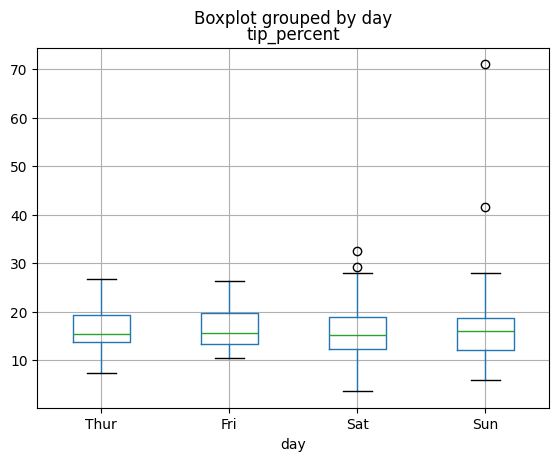

In [22]:
df.boxplot(column='tip_percent', by='day')


Correlation & Relationship Analysis

In [23]:
df[['total_bill', 'tip', 'tip_percent']].corr()


,total_bill,tip,tip_percent
total_bill,1.000000,0.675734,-0.338624
tip,0.675734,1.000000,0.342370
tip_percent,-0.338624,0.342370,1.000000


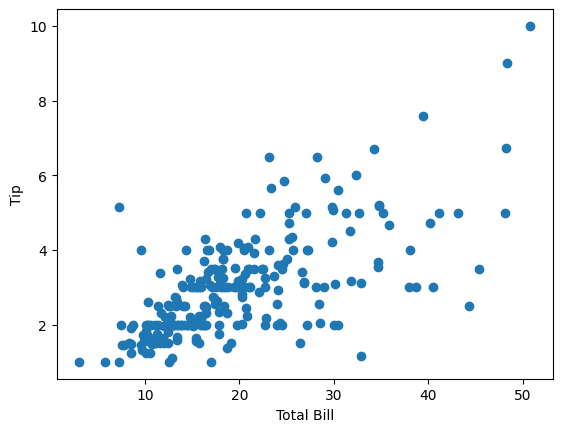

In [24]:
import matplotlib.pyplot as plt

plt.scatter(df['total_bill'], df['tip'])
plt.xlabel('Total Bill')
plt.ylabel('Tip')
plt.show()


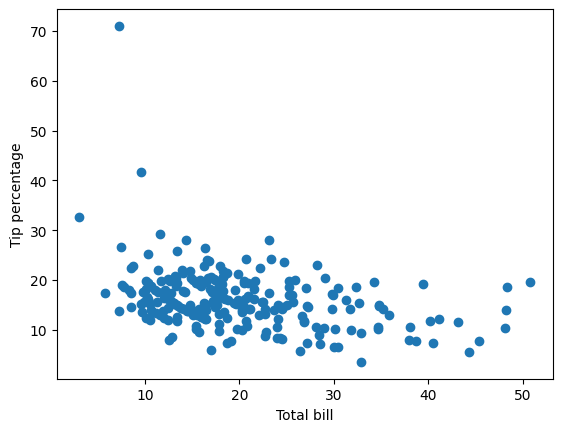

In [25]:
plt.scatter(df['total_bill'],df['tip_percent'])
plt.xlabel('Total bill')
plt.ylabel('Tip percentage')
plt.show()

**Business recommendations **:

**1** Focus on High-Footfall Times
*    Weekends bring higher spending
*  Increase staffing & service      quality on weekends

**2️** Encourage Group Visits
*  Group-based offers (≥6 people)
*  Combo meals & discounts

**3️** Improve Tip Percentage on High Bills


*  Add subtle tip suggestions
*  Better service for high-bill tables

**4️** Target Solo Customers
*   Loyalty offers
*   Fast service & personalized experience



**Conclusion**:
This project demonstrates how data analysis and interpretation can be used to derive actionable business insights.